# Unit #3 Code: Regression Inference, Prediction, and Explanation

In this code, we will implement and apply inference concepts that we learned about in Unit #3.

## Problem #1

Let's take a look at the some [weather data](https://www.kaggle.com/budincsevity/szeged-weather/home). Our goal will be to think about prediction and explanation with respect to this data. But, this is a (somewhat) large dataset, and along the way, I'll ask you to clean and subset the data (these are important skills for data scientists).

Here's a call to load the data:

In [1]:
library(tidyverse) 
library(dplyr) #the select() and rename() functions in the dplyr library might help!
library(ggplot2) #if you want to plot with ggplot...

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
weather = read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/weatherhistory.txt", sep = "\t")

#### (a) Print out the column names for this dataset. Our goal is to see how humidity does in predicting apparent temperature, while adjusting for some other variables. Construct a new dataframe with the date, temperature, apparent temperature, humidity, and windspeed. Also, since the names are a bit ugly, change them to:

"date", "temp", "atemp", "humid", "wspeed"

In [3]:
colnames(weather)
weatherData = data.frame(weather$Formatted.Date, weather$Humidity, weather$Temperature..C, weather$Apparent.Temperature..C, weather$Wind.Speed..km.h)
names(weatherData)[1] <- "date"
names(weatherData)[2] <- "humid"
names(weatherData)[3] <- "temp"
names(weatherData)[4] <- "atemp"
names(weatherData)[5] <- "wspeed"
head(weatherData)
dim(weatherData)

[1] "Formatted.Date"           "Summary"                 
 [3] "Precip.Type"              "Temperature..C."         
 [5] "Apparent.Temperature..C." "Humidity"                
 [7] "Wind.Speed..km.h."        "Wind.Bearing..degrees."  
 [9] "Visibility..km."          "Loud.Cover"              
[11] "Pressure..millibars."     "Daily.Summary"

date,humid,temp,atemp,wspeed
2006-04-01 00:00:00.000 +0200,0.89,9.472222,7.388889,14.1197
2006-04-01 01:00:00.000 +0200,0.86,9.355556,7.227778,14.2646
2006-04-01 02:00:00.000 +0200,0.89,9.377778,9.377778,3.9284
2006-04-01 03:00:00.000 +0200,0.83,8.288889,5.944444,14.1036
2006-04-01 04:00:00.000 +0200,0.83,8.755556,6.977778,11.0446
2006-04-01 05:00:00.000 +0200,0.85,9.222222,7.111111,13.9587


[1] 96453     5

#### (b) Split the data into a training and testing set (as in previous assignments). Fit a linear model where atemp is the response and humid wspeed are predictors. Print the lm() summary.

In [4]:
set.seed(11)
library(caTools)
sample = sample.split(weatherData, SplitRatio = 0.80)
train = subset(weatherData, sample == TRUE)
test = subset(weatherData, sample == FALSE)
model1 = lm(data = train, atemp ~ humid + wspeed)
summary(model1)

Warning message:
"package 'caTools' was built under R version 3.6.2"


Call:
lm(formula = atemp ~ humid + wspeed, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.800  -5.641   0.657   6.270  24.298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.306334   0.137095  294.00   <2e-16 ***
humid       -35.460712   0.156204 -227.02   <2e-16 ***
wspeed       -0.313553   0.004416  -71.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.27 on 77159 degrees of freedom
Multiple R-squared:  0.4025,	Adjusted R-squared:  0.4025 
F-statistic: 2.599e+04 on 2 and 77159 DF,  p-value: < 2.2e-16


#### (c) Compute the standard error, t-value, and p-value explicitly and make sure that they match the summary above.

In [24]:
RSS = sum(resid(model1)^2)
colOne = matrix(1,77162,1)
X = cbind(colOne, train$humid, train$wspeed)
sigma = sqrt(RSS/(77162-3))
varCov = solve(t(X) %*% X)
se1 = sqrt(varCov[1,1]) * sigma
se2 = sqrt(varCov[2,2]) * sigma
se3 = sqrt(varCov[3,3]) * sigma
tval1 = 40.306334/se1
tval2 = -35.460712/se2
tval3 = -0.313553/se3
pval1 = dt(tval1, 77162-3)
pval2 = dt(tval2,77162-3)
pval3 = dt(tval3,77162-3)
cat('SE of Beta one:', se1, 'T-value of Beta one:', tval1, 'P-value of Beta one:', pval1, '\n')
cat('SE of Beta two:', se2, 'T-value of Beta two:', tval2, 'P-value of Beta two:', pval2, '\n')
cat('SE of Beta three:', se3, 'T-value of Beta three:', tval3, 'P-value of Beta three:', pval3)

SE of Beta one: 0.1370946 T-value of Beta one: 294.0039 P-value of Beta one: 0 
SE of Beta two: 0.1562036 T-value of Beta two: -227.0159 P-value of Beta two: 0 
SE of Beta three: 0.004415798 T-value of Beta three: -71.0071 P-value of Beta three: 0

#### (d) Construct 90% confidence intervals for each MLR parameter.

In [25]:
confint(model1, level = 0.9)

,5 %,95 %
(Intercept),40.080831,40.5318374
humid,-35.717648,-35.2037773
wspeed,-0.320816,-0.3062891


#### (e) Conduct an F-test to compare the full model above with the SLR model containing only humidity. What other test is this F-test equivalent to?

In [26]:
model2 = lm(data = train, atemp~humid) 
anova(model1, model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
77159,5277270,NA,NA,NA,NA
77160,5622116,-1,-344845.9,5041.994,0


Ask about what this means

#### (f) Randomly choose five values from the training set, and use those humidity and windspeed values to predict apparent temperature. Be sure to provide and interpret prediction intervals. 

In [39]:
set.seed(211)
fiveVal = sample_n(test,5)
fiveVal
predict.lm(model1, fiveVal, interval = 'predict', level = 0.90)

date,humid,temp,atemp,wspeed
2014-11-17 21:00:00.000 +0100,0.89,8.844444,8.844444,3.3649
2015-09-12 06:00:00.000 +0200,1.00,11.100000,11.100000,3.1556
2006-06-26 12:00:00.000 +0200,0.52,31.133333,33.266667,14.2324
2006-09-16 00:00:00.000 +0200,0.62,19.188889,19.188889,10.8675
2016-05-23 18:00:00.000 +0200,0.40,27.683333,27.377778,1.9320


fit,lwr,upr
7.691227,-5.912278,21.29473
3.856175,-9.747421,17.45977
17.404158,3.800671,31.00764
14.913160,1.309754,28.51657
25.516266,11.912375,39.12016


The above sample shows 5 random rows from the test set and the predict.lm function is using the humid and wspeed variables from the new data to construct a 90% PI where the lower bounds are the second column and the upper bound is the third column. The interval is using the formula $\hat{y}^{*} \pm t_{\alpha /2, n-(p+1)} \cdot \sqrt{\hat{\sigma} (1 + X^{*T} (X^{T}X)^{-1} X^{*})}$

#### (g) Compute the predicted MSE for all values in the training set using both the MLR and SLR models above. Which performs better?

In [41]:
mseMLR = mean((test$atemp - predict.lm(model1,test))^2)
mseSLR = mean((test$atemp - predict.lm(model2,test))^2)
mseMLR
mseSLR

[1] 68.5509

[1] 72.93472

The MLR model did better, and adding additional parameters will always reduce the MSE of the model, but the more important question is whether it is appropriate to include those parameters

#### (h) Describe some difficulties in using the MLR model for explanation for this dataset. Can we infer causality (e.g., that changes in windspeed and humidity cause changes in apparent temperature)? If so, why? If not, what might we need to do to infer causality?

## Problem #2

The PlantGrowth data contains results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. 

#### (a) Load the data into R and construct a boxplot of weight for each group (the control, treatment 1, and treatment 2). What do you notice about the distribution of weight across these three groups?

weight,group
4.17,ctrl
5.58,ctrl
5.18,ctrl
6.11,ctrl
4.50,ctrl
4.61,ctrl


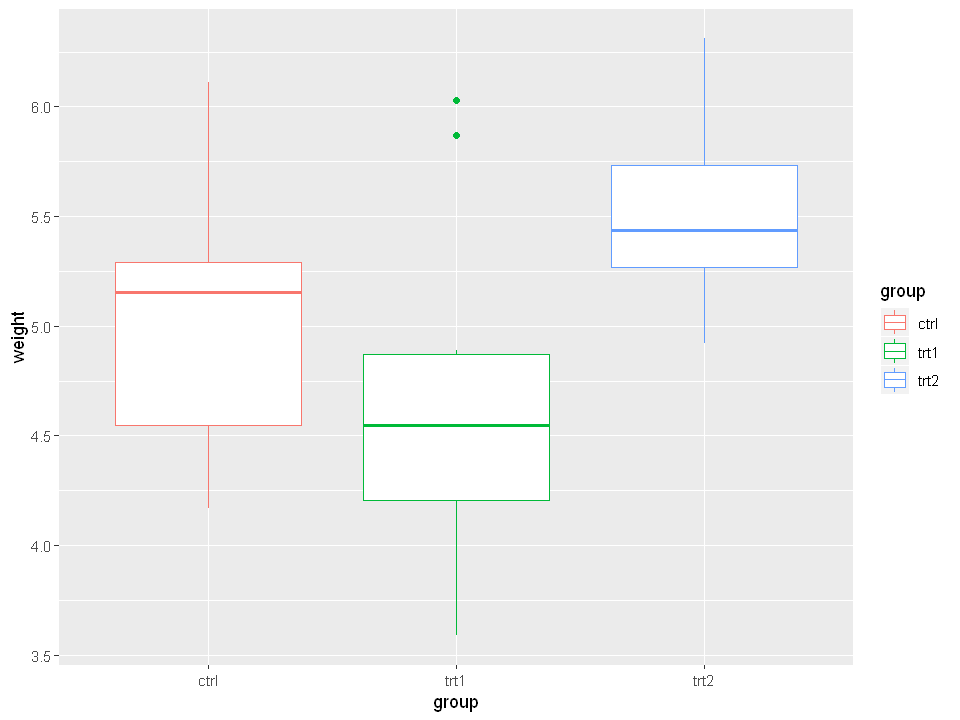

In [32]:
data(PlantGrowth)
head(PlantGrowth)
options(repr.plot.width=8, repr.plot.height=6)
ggplot(PlantGrowth, aes(x = group, y = weight, color = group))+geom_boxplot()

The inter-quartile range of the control and treatment 1 group is almost exactly the same, while it is tighter for treatment 2. The median is highest for treatment 2 followed by control and then treatment 1

#### (b) Perform a regression that uses weight as the response and group as the predictor. Print the summary. Notice that the result is actually *multiple* linear regression, not simple linear regression. The model being used here is:

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \varepsilon_i
\end{align*}

where 

1. $X_{i,1} = 1$ if the $i^{th}$ plant is in the first treatment group and zero otherwise.
2.  $X_{i,2} = 1$ if the $i^{th}$ plant is in the second treatment group and zero otherwise.

Notice that, if $X_{i,1} = 1$ and $X_{i,2} = 1$ are both zero, then the $i^{th}$ plant is in the control group.

#### Print out the design matrix to confirm that this is the model being used.

In [33]:
modelB2 = lm(data = PlantGrowth, weight ~ group)
summary(modelB2)
head(model.matrix(modelB2))


Call:
lm(formula = weight ~ group, data = PlantGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1971  25.527   <2e-16 ***
grouptrt1    -0.3710     0.2788  -1.331   0.1944    
grouptrt2     0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


(Intercept),grouptrt1,grouptrt2
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0


#### (c) There are three groups in this study. Why are there only two predictors in the model? To investigate this, consider fitting a new model: 

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \beta_2 X_{i,3} + \varepsilon_i
\end{align*}

where 

1. $X_{i,1} = 1$ if the $i^{th}$ plant is in the first treatment group and zero otherwise.
2. $X_{i,2} = 1$ if the $i^{th}$ plant is in the second treatment group and zero otherwise.
3. $X_{i,3} = 1$ if the $i^{th}$ plant is in the control group and zero otherwise.

#### What would happen when you fit this model? (Hint: Something is wrong with the design matrix!)


The reason we don't use three parameters is because there are only two degrees of freedom. If a plant is not in the control group or treatment one then we know it is in treatment 2. If we attempted to fit this model the design matrix would be the incorrect size...come back to this one

#### (d) Interpret the coefficients in the model above. In particular:

1. what is the mean yield of the control group?
2. what is the mean yield of the treatment 1 group?
3. What is the difference in the mean between the control group and and the second treatment group?

The average weight for the control group is 5.032, if a plant uses treatment one will see a average wieght loss of -0.3710 so the average weight will be 4.661 and if a plant uses treatment 2 it will see an average weight gain of 0.4940

#### (e) Is there reason to believe that there is *some* difference in means between the control group and a treatment group?

There may be reason to think that the second treatment is effective at producing heavier plants. The p-value with the $\beta_2$ parameter is 0.0877 so we can be 90% certain there is an postive effect, but not 95% certain

#### (f) The R help file claims that this is an experiment. What are some facts that we should consider about the design of the experiment before we might feel comfortable making causal claims about the treatments (e.g., that on average treatment 1 caused an increase in yield of $u$ units over the control)?

We should consider whether this data was gathered in a way that violates our regression assumptions (iid, homoskedacity, normal errors, data was not discarded in a non-random fashion)...ask about this later